### 42. Trapping Rain Water

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

 

Example 1:

Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]<br>
Output: 6 <br>
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. In this case, 6 units of rain water (blue section) are being trapped.
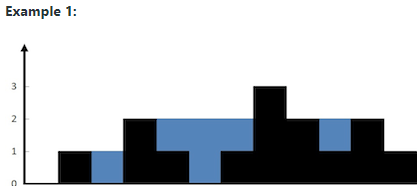
Example 2:

Input: height = [4,2,0,3,2,5]<br>
Output: 9

### 빗물 트래핑 
---
높이를 입력받아 비 온 후 얼마나 많은 물이 쌓일 수 있는지 계산하라.

* __입력__
> [0,1,0,2,1,0,1,3,2,1,2,1]
* __출력__
> 6
* __설명__ <br>
 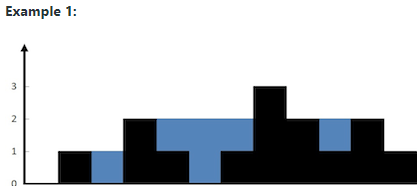

###  풀이 1. 투 포인터를 최대로 이동
---
이 문제는 높이와 너비 모든 공간을 차례대로 모두 살펴보면 _O(n^2)_ 에 풀이가 가능하다.
그러나 시간 복잡도가 너무 높기 때문에 좀 더 효율적인 풀이를 찾아야 한다. 투 포이터나 스택으로 _O(n)_ 풀이가 가능할 것 같다. 먼저 투 포인터 풀이부터 살펴보자.
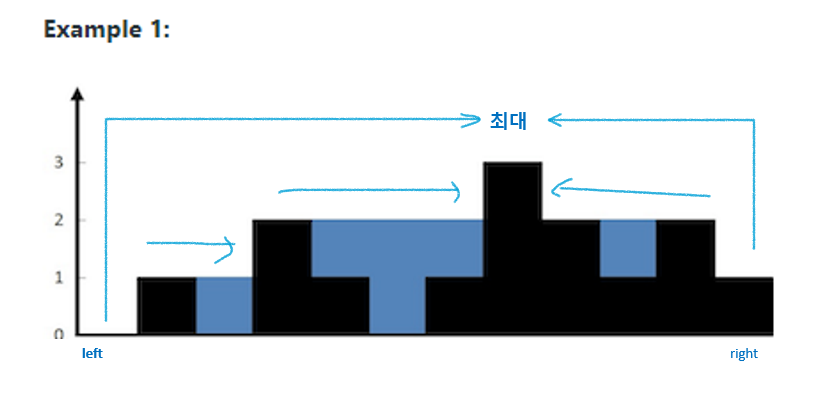
* __그림 7-5__ 투 포인터가 최대를 향해 이동하는 풀이 


그림 7-5에서 가장 높이가 높은 막대를 한번 살펴보자. 이 그림에서 최대 높이는 3이지만 100이어도 관계는 없다. 막재는 높고 낮음에 무관하게, 전체 부피에 영향을 끼치지 않으면서 그저 왼쪽과 오른쪽을 가르는 장벽 역할을 한다.

    volume += left_max - height[left]
    ...
    volume += right_max - height[right]
    
이처럼 최대 높이의 막대까지 각각 좌우 기둥 최대 높이 left_max,right_max가 현재 높이와의 차이만큼 물 높이 volume을 더해 나간다.
    
    if left_max <= right_max:
        volume += left_max - height[left]
        left += 1
    else:
        volume += right_max = height[right]
        right == 1
        
이 경우 적어도 낮은 쪽은 그만큼 항상 채워질 것이기 때문에, 좌우 어느쪽이든 낮은 쪽은 높은 쪽을 향해서 포인터가 가운데로 점점 이동한다. 오른쪽이 크다면left +=1로 왼쪽이 이동하고 , 그렇지 않다면 (즉, 왼쪽이 크다면) right-=1로 오른쪽이 이동한다. 이렇게 하면 그림 7-5에서 가장 높이가 높은 막대, 즉 '최대' 지점에서 좌우 포인터가 서로 만나게 되며 _O(n)_ 에 풀이가 가능하다. 전체 코드는 다음과 같다.

In [ ]:
def trap(self, height: List[int]) -> int:
    if not height:
        return 0
    
    volume = 0
    left, right = 0, len(height) -1
    left_max,right_max = height[left], height[right]
    
    while left < right:
        left_max,right_max = max(height[left], left_max), 
                            max(height[right], right_max)
        # 더 높은 쪽을 향해 투 포인터 이동
        if left_max <= right_max:
            volume +=  left_max - height[left]
            left += 1
        else:
            volume += right_max - height[right]
            right -= 1
    return volume

### 풀이 2. 스택 쌓기
---
이번에는 스택으로 풀이해보자.

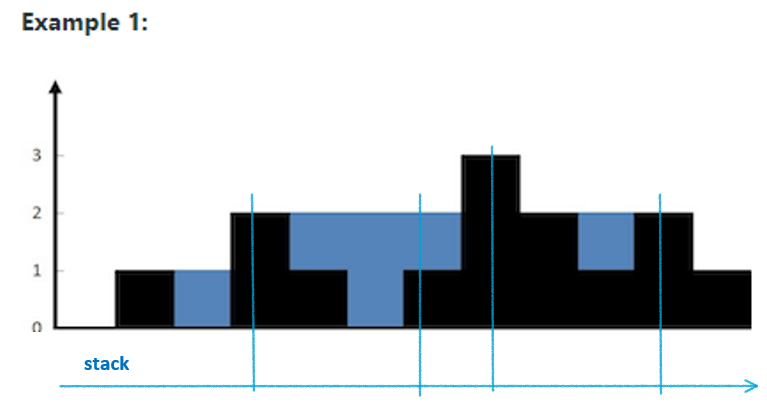

* __그림 7-6__ 스택에 쌓아 나가면서 풀이 

그림 7-6과 같이 스택에 쌓아 나가면서 현재 높이가 이전 높이보다 높을 때, 즉 꺾이는 부분 변고점(Inflection Point)을 기준으로 격차만큼 물 높이(Volume)를 채운다. 이전 높이는 고정된 형태가 아니라 들쑥날쑥하기 때문에, 계속 스택으로 채워 나가다가 변곡점을 만날때 마다 스택에서 하나씩 꺼내면서 이전과의 차이만큼 물 높이를 채워 나간다. 스택으로 이전 항목들을 되돌아보며 체크하기는 하지만, 기본적으로 한 번만 살펴보기 때문에 마찬가지로 _O(n)_ 에 풀이가 가능하다. 전체 코드는 다음과 같다.

In [ ]:
def trap(self, height: List[int]) -> int:
    stack = []
    volume = 0
    
    for i in range(len(height)):
        # 변곡점을 만날 경우
        while stack and height[i] > height[stack[-1]]:
            #스택에서 꺼낸다.
            top = stack.pop()
            
            if not len(stack):
                break
                
            # 이전과의 차이만큼 물 높이 처리 
            distance = i - stack[-1] - 1
            waters = min(height[i], height[stack[-1]]) - height[top]
            
            volume += distance * waters
            
        stack.append(i)
    return volume   

이 문제는 상당히 어려운 문제이다. 특히 스택 쌓기 풀이는 직관적으로 떠올리기가 쉽지 않을 뿐더러 풀이 방법 또한 많이 고민해봐야 하는 문제로, 만약 코딩 테스트에서 마주치게 된다면 제대로 동작하는 코드를 작성하기 위해서는 적지 않은 시간이 필요할 것이다. 하지만 온사이트 인터뷰 시 면접관이 이 문제를 화이트보드에 풀어보라고 요구하는 경우에는 그림 7-5 또는 7-6을 화이트보드에 그리는 정도로 개념을 잘 잡아서 설명하면 그리 어렵지 않을 것 같다. 투 포인터나 스택중 하나를 택해 개념을 잘 설명해나가면, 비교적 짧은 시간에 수도코드 풀이가 가능할 것이다.